In [1]:
import os,sys
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms
import tqdm

import matplotlib.pyplot as plt

In [2]:
sys.path.append("../")

In [3]:
from Transformers import ChannelsFirst, ToTensor, Rescale, Cut, splitter
from DataSets import UNetDataSetFromNpz
import torch.optim as optim
from cUNet_pytorch_pooling import cUNet, dice_loss
from sklearn.metrics import mean_squared_error
from torch.utils.data import DataLoader

In [4]:
DATA_DIR_DEEPTHOUGHT = os.path.join("/",'storage','yw18581','data')
data_dir = DATA_DIR_DEEPTHOUGHT
train_test = os.path.join(data_dir, "train_validation_test")

In [5]:
composed_npz = transforms.Compose([Rescale(0.25), ChannelsFirst(), ToTensor()])

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
batch_size=32
epochs = 50
coeff_mask = 0.75

In [8]:
test_data = np.load(os.path.join(train_test,"Xy_test_clean_300_24_10_25.npz"))
x_test = test_data["x"]
y_test = test_data['y']
dist_test = test_data['dist']



In [9]:
test_dataset = UNetDataSetFromNpz(x_test, y_test, transform=composed_npz, dist = dist_test[...,np.newaxis])

test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

In [8]:
model_name = "../model/trained_cUNet_pytorch_regression_validation_{}epochs_coeff_mask{}_batch{}_on_npz.pkl".format(epochs, coeff_mask, batch_size)

In [9]:
model2 = "../model/trained_cUNet_pytorch_regression_50epochs_coeff_mask0.75_validation_on_npz_notranspose.pkl"

In [10]:
model_inference = cUNet(out_size=1)
model_inference.load_state_dict(torch.load(model2))
model_inference = model_inference.eval()
model_inference.to(device)

cUNet(
  (conv_block_down1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_d

In [12]:
batch_size=16

In [14]:
y_true = []
y_pred = []

for i, batch in enumerate(test_data_loader):
    true_images, true_dists = batch['image'], batch['dist']
    _, pred_dists = model_inference(true_images.float().to(device))
    print("batch {}".format(i + 1))
    for j, (img, tr_dist, pr_dist) in enumerate(zip(true_images,
                                                true_dists.cpu().detach().numpy(),
                                                pred_dists.cpu().detach().numpy())):
        true_dist = tr_dist
        pred_dist = pr_dist
        y_true.append(true_dist)
        y_pred.append(pred_dist)

y_pred = np.asarray(y_pred).ravel()
y_true = np.asarray(y_true)

print("mse: {}".format(mean_squared_error(y_true, y_pred)))

batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
batch 7
batch 8
batch 9
batch 10
batch 11
batch 12
batch 13
batch 14
batch 15
mse: 0.024706257454023314


batch 1
1: true_dist: [10], pred_dist: [9.760734]


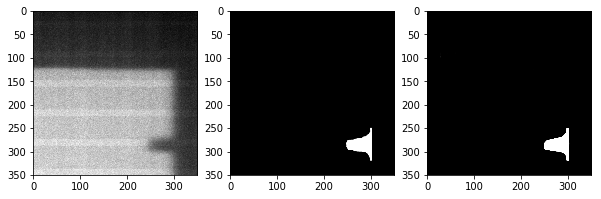

2: true_dist: [2], pred_dist: [1.988889]


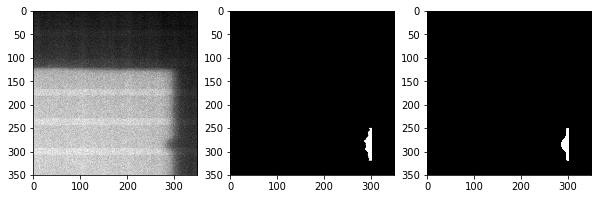

3: true_dist: [10], pred_dist: [9.811735]


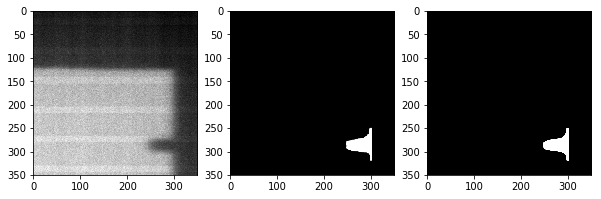

4: true_dist: [25], pred_dist: [25.175278]


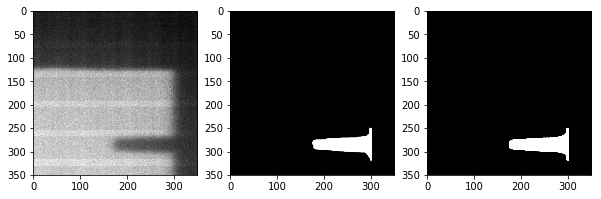

5: true_dist: [25], pred_dist: [24.885872]


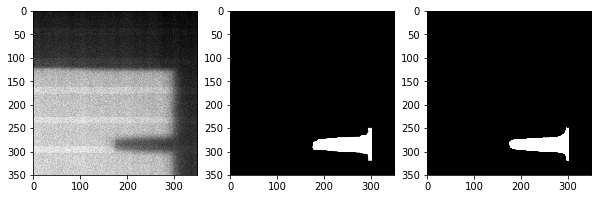

6: true_dist: [4], pred_dist: [3.8246624]


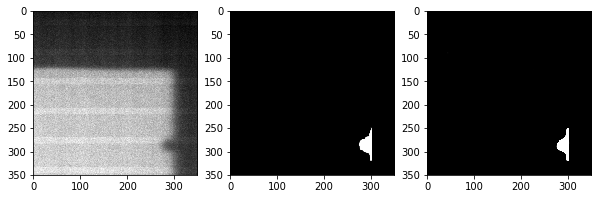

7: true_dist: [10], pred_dist: [9.909538]


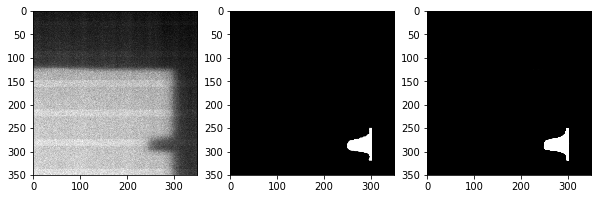

8: true_dist: [4], pred_dist: [3.719251]


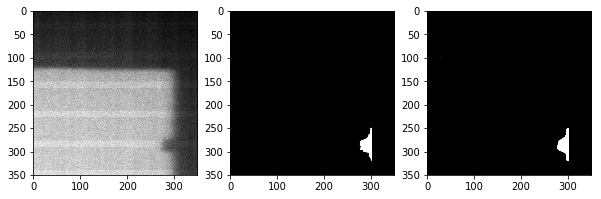

9: true_dist: [10], pred_dist: [9.985365]


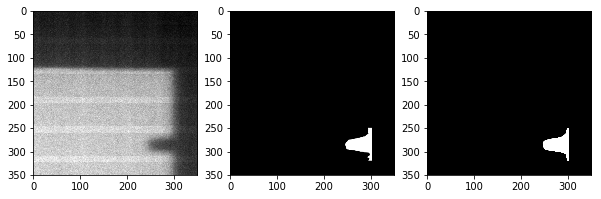

10: true_dist: [4], pred_dist: [3.9153154]


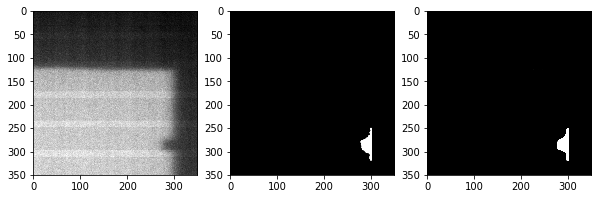

11: true_dist: [10], pred_dist: [9.870118]


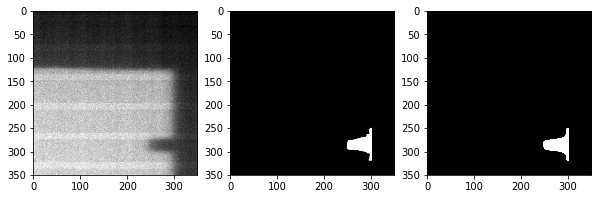

12: true_dist: [4], pred_dist: [3.7063723]


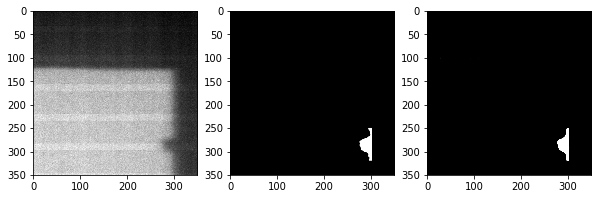

13: true_dist: [2], pred_dist: [1.9542749]


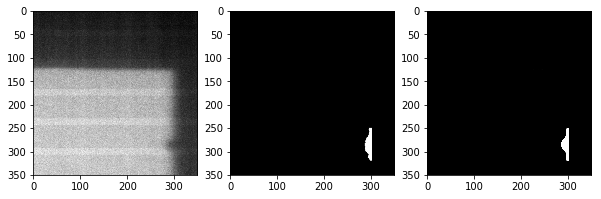

14: true_dist: [25], pred_dist: [25.201237]


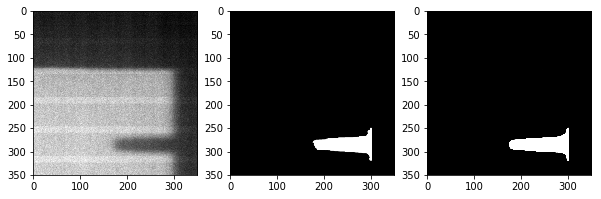

15: true_dist: [4], pred_dist: [3.9323287]


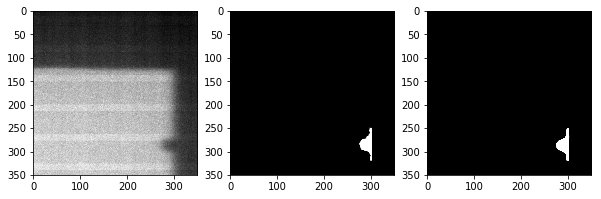

16: true_dist: [4], pred_dist: [3.7224517]


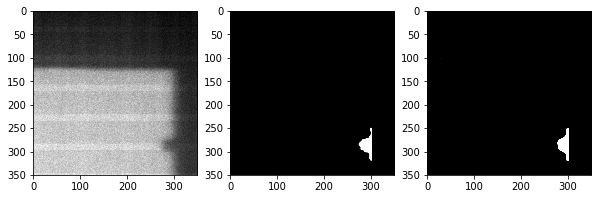

batch 2
1: true_dist: [10], pred_dist: [9.8144]


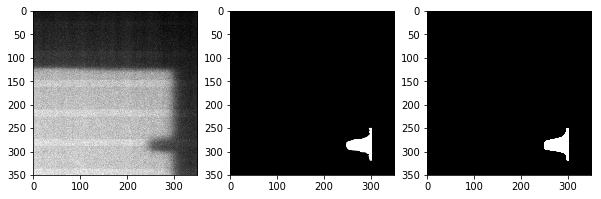

2: true_dist: [25], pred_dist: [24.763855]


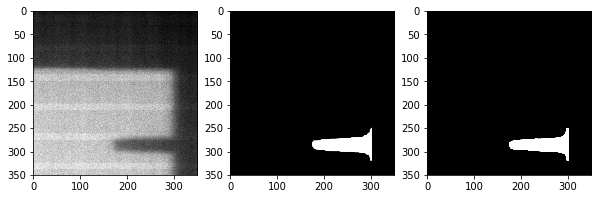

3: true_dist: [4], pred_dist: [3.838119]


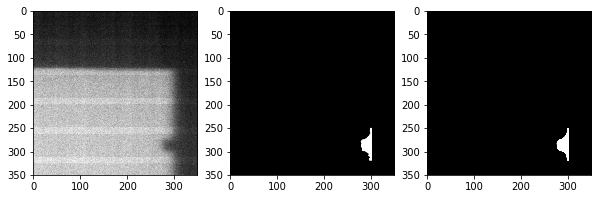

4: true_dist: [2], pred_dist: [1.9846461]


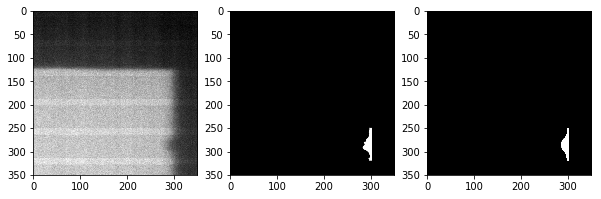

5: true_dist: [25], pred_dist: [25.169369]


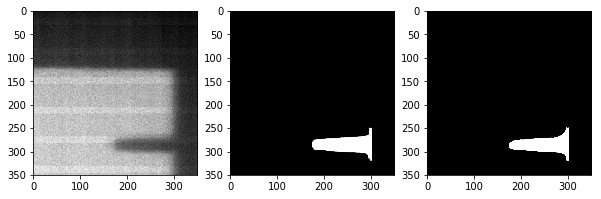

6: true_dist: [10], pred_dist: [9.79354]


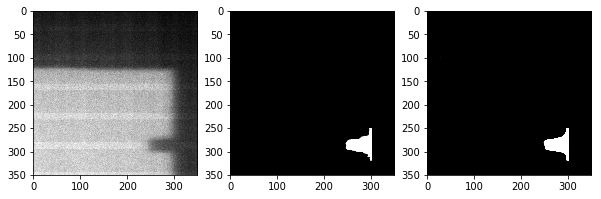

7: true_dist: [4], pred_dist: [3.7365854]


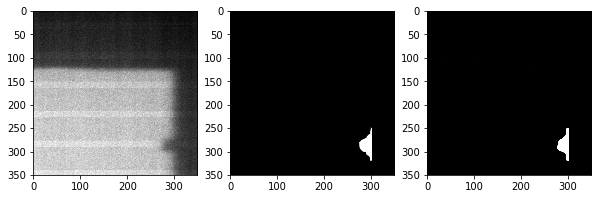

8: true_dist: [4], pred_dist: [3.827578]


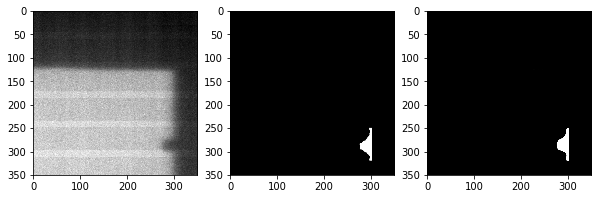

9: true_dist: [4], pred_dist: [3.7322087]


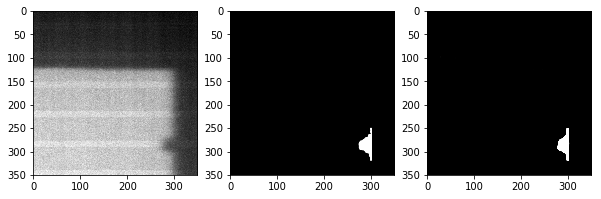

10: true_dist: [2], pred_dist: [1.8539531]


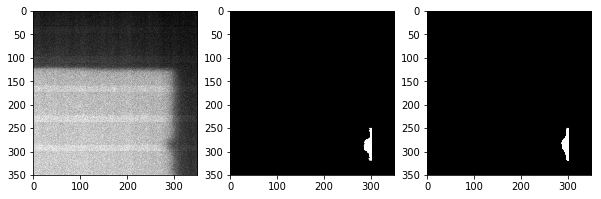

11: true_dist: [2], pred_dist: [1.8787546]


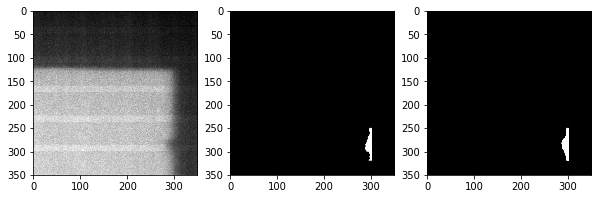

12: true_dist: [25], pred_dist: [24.704327]


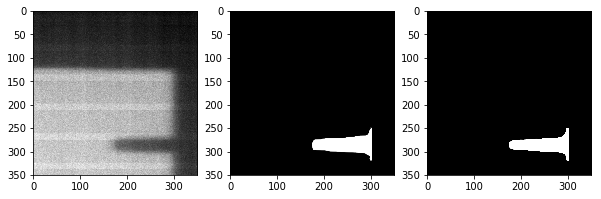

13: true_dist: [10], pred_dist: [9.804135]


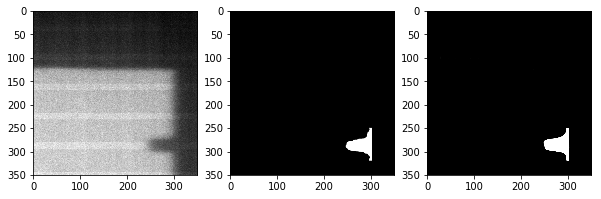

14: true_dist: [10], pred_dist: [9.974383]


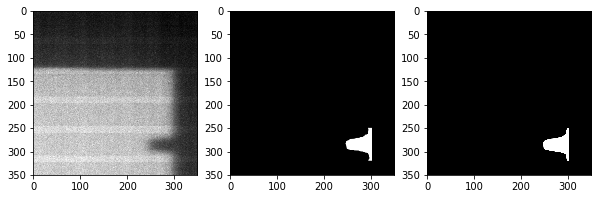

15: true_dist: [10], pred_dist: [9.956948]


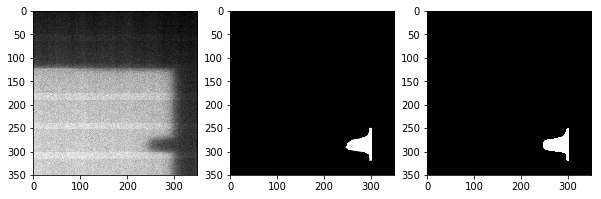

16: true_dist: [4], pred_dist: [3.9624262]


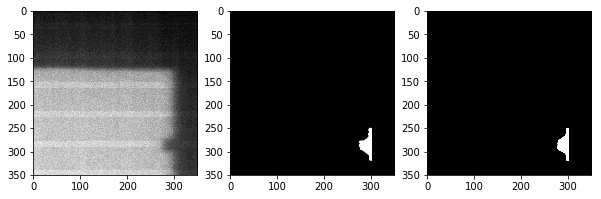

In [15]:
for i, batch in enumerate(test_data_loader):

    true_images, true_masks, true_dists = batch['image'], batch['mask'], batch['dist']
    pred_masks, pred_dists = model_inference(true_images.float().to(device))
    print("batch {}".format(i+1))
    for j, (img, tr_msk, tr_dist, pr_msk, pr_dist) in enumerate(zip(true_images,
                                                 true_masks, 
                                                 true_dists.cpu().detach().numpy(),
                                                 pred_masks.cpu().detach().numpy(), 
                                                 pred_dists.cpu().detach().numpy())):
    
        true_dist = tr_dist
        pred_dist = pr_dist
        print("{}: true_dist: {}, pred_dist: {}".format(j+1, true_dist, pred_dist))
        
        f = plt.figure(figsize=(10,5))
        f.add_subplot(1,3, 1)
        plt.imshow(img[0,...], cmap='gray')
        f.add_subplot(1,3, 2)
        plt.imshow(tr_msk[0,...], cmap='gray')
        f.add_subplot(1,3, 3)
        plt.imshow(pr_msk[0,...], cmap='gray')
        plt.show(block=True)
        
    if i==1:
        break

In [10]:
model3 = "../model/trained_cUNet_regression_validation_50epochs_coeff_mask0.75_batch16_on_npz.pkl"

In [11]:
model_inference = cUNet(out_size=1)
model_inference.load_state_dict(torch.load(model3))
model_inference = model_inference.eval()
model_inference.to(device)

cUNet(
  (conv_block_down1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_d

In [12]:

y_true = []
y_pred = []

for i, batch in enumerate(test_data_loader):
    true_images, true_dists = batch['image'], batch['dist']
    _, pred_dists = model_inference(true_images.float().to(device))
    print("batch {}".format(i + 1))
    for j, (img, tr_dist, pr_dist) in enumerate(zip(true_images,
                                                true_dists.cpu().detach().numpy(),
                                                pred_dists.cpu().detach().numpy())):
        true_dist = tr_dist
        pred_dist = pr_dist
        y_true.append(true_dist)
        y_pred.append(pred_dist)

y_pred = np.asarray(y_pred).ravel()
y_true = np.asarray(y_true)

batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
batch 7
batch 8


In [13]:
print("mse: {}".format(mean_squared_error(y_true, y_pred)))

mse: 0.018286937660646884


batch 1
1: true_dist: [2], pred_dist: [2.0265956]


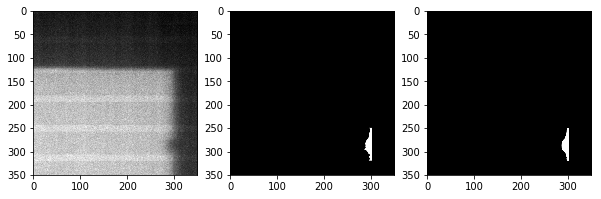

2: true_dist: [10], pred_dist: [9.831243]


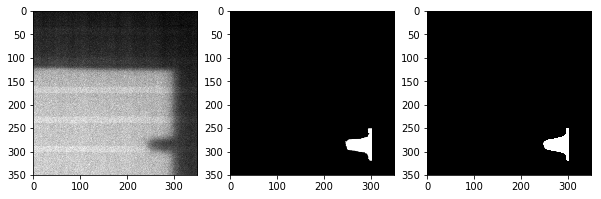

3: true_dist: [25], pred_dist: [25.022339]


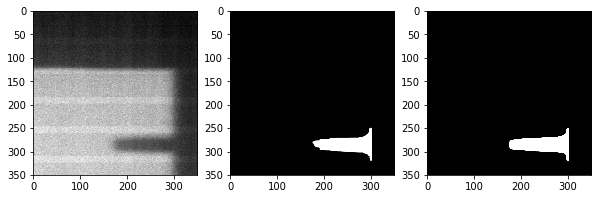

4: true_dist: [10], pred_dist: [9.823218]


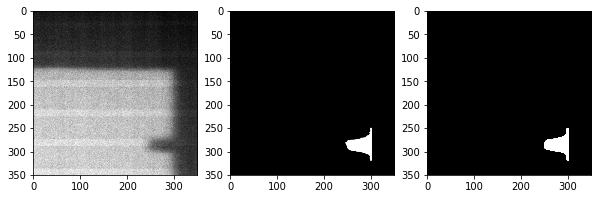

5: true_dist: [10], pred_dist: [10.268482]


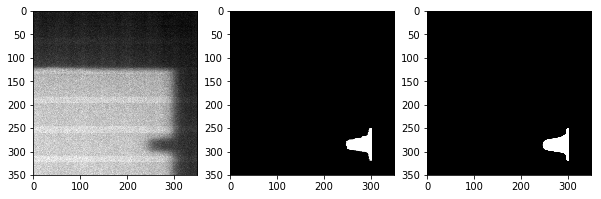

6: true_dist: [4], pred_dist: [3.8997202]


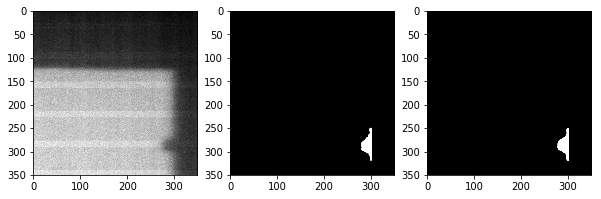

7: true_dist: [10], pred_dist: [9.81849]


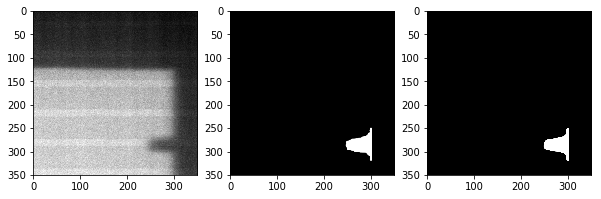

8: true_dist: [10], pred_dist: [10.068979]


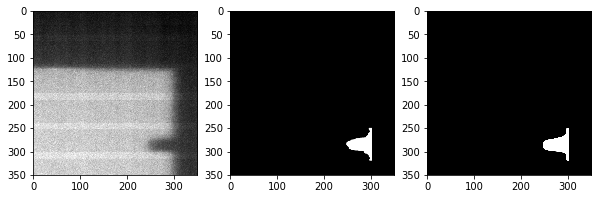

9: true_dist: [2], pred_dist: [1.8963548]


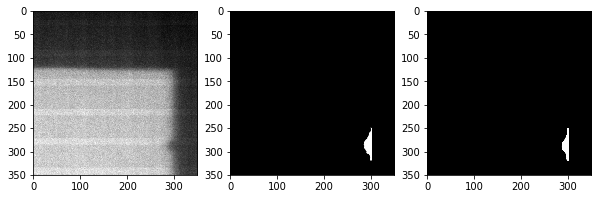

10: true_dist: [10], pred_dist: [9.965685]


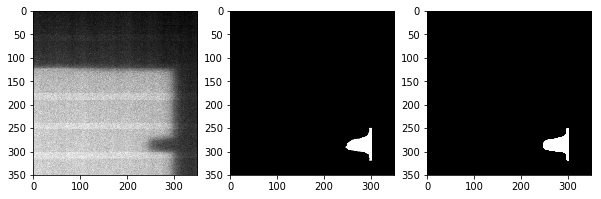

11: true_dist: [10], pred_dist: [10.0038595]


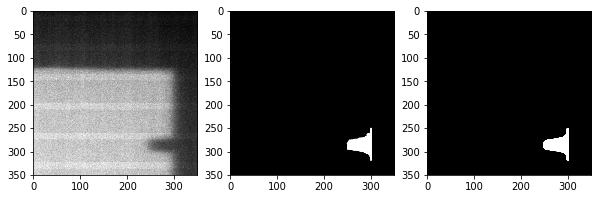

12: true_dist: [25], pred_dist: [24.984325]


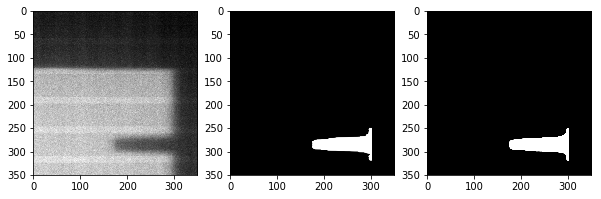

13: true_dist: [25], pred_dist: [24.835358]


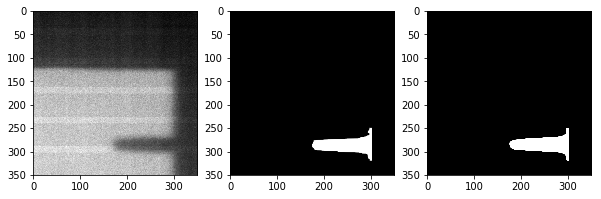

14: true_dist: [2], pred_dist: [1.9764618]


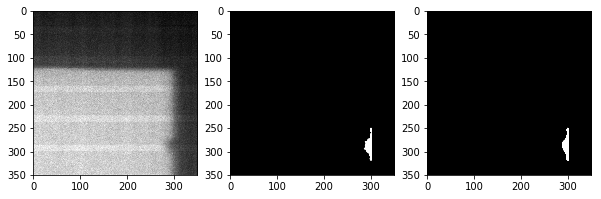

15: true_dist: [2], pred_dist: [1.9894354]


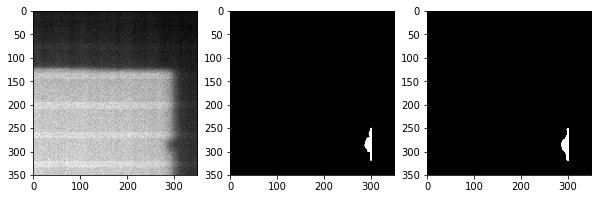

16: true_dist: [2], pred_dist: [1.9586734]


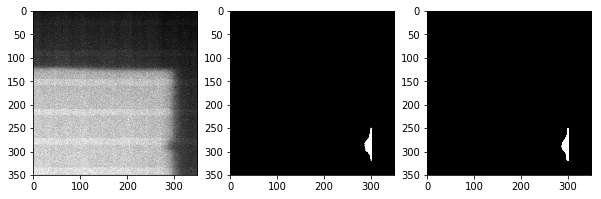

17: true_dist: [4], pred_dist: [4.030643]


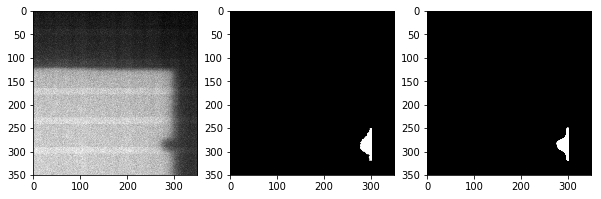

18: true_dist: [4], pred_dist: [4.1430144]


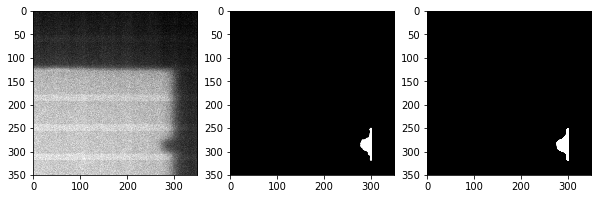

19: true_dist: [2], pred_dist: [1.9662039]


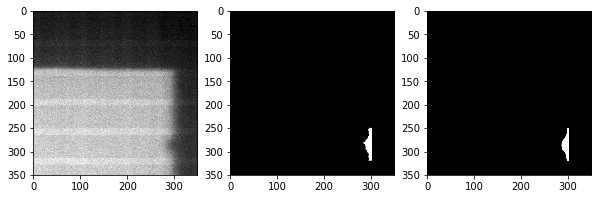

20: true_dist: [25], pred_dist: [25.0588]


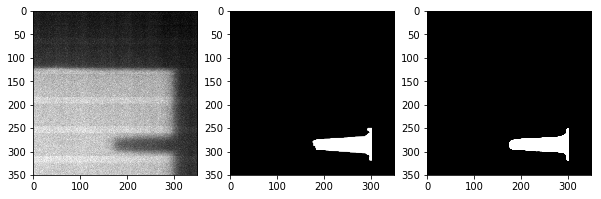

21: true_dist: [2], pred_dist: [2.0875278]


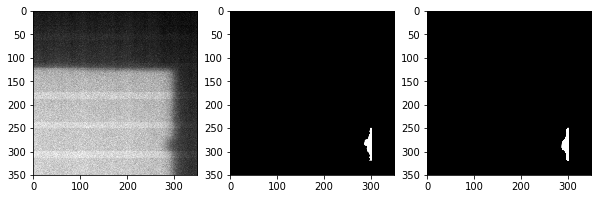

22: true_dist: [10], pred_dist: [9.951993]


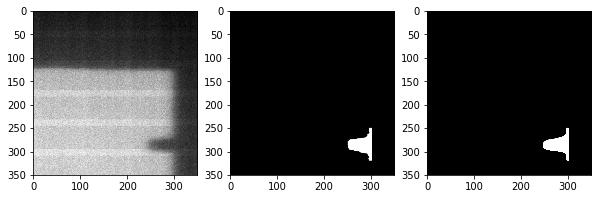

23: true_dist: [10], pred_dist: [9.746348]


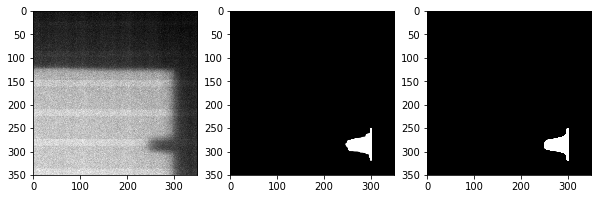

24: true_dist: [2], pred_dist: [1.9389405]


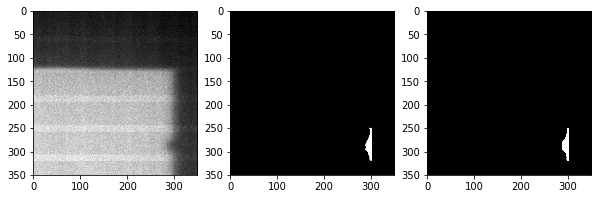

25: true_dist: [4], pred_dist: [3.9190676]


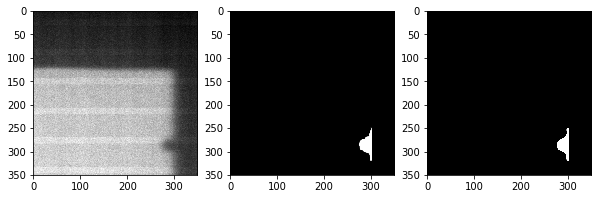

26: true_dist: [2], pred_dist: [1.9719673]


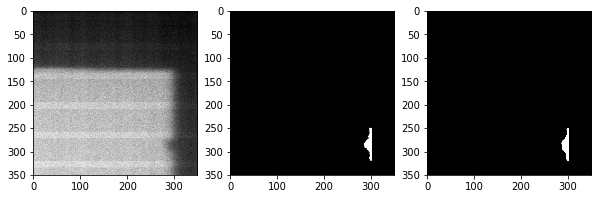

27: true_dist: [25], pred_dist: [25.112194]


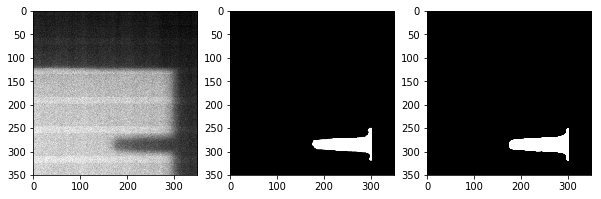

28: true_dist: [2], pred_dist: [1.9150858]


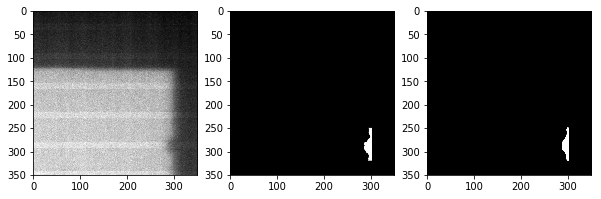

29: true_dist: [4], pred_dist: [3.963653]


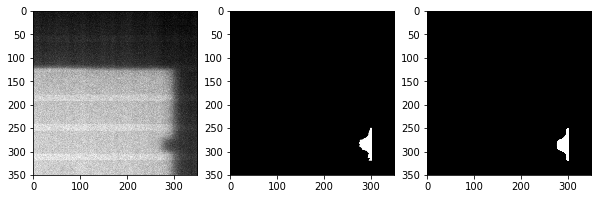

30: true_dist: [10], pred_dist: [10.002011]


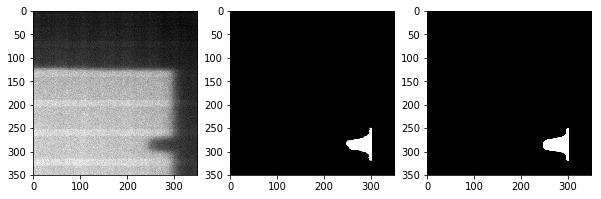

31: true_dist: [10], pred_dist: [9.952865]


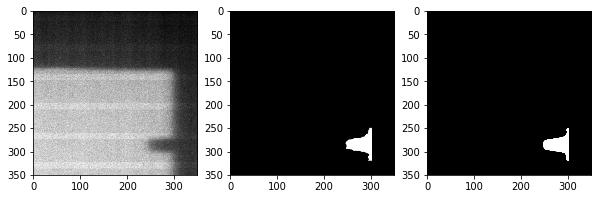

32: true_dist: [4], pred_dist: [3.8062162]


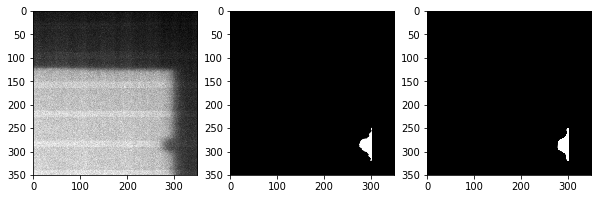

batch 2
1: true_dist: [4], pred_dist: [3.8989484]


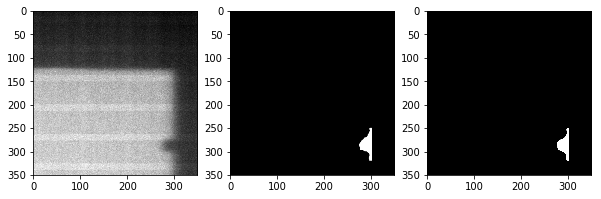

2: true_dist: [25], pred_dist: [24.759586]


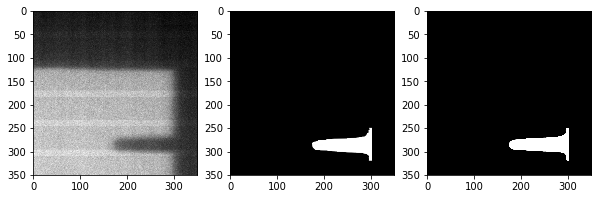

3: true_dist: [10], pred_dist: [10.0319605]


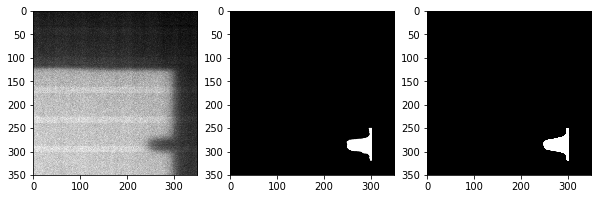

4: true_dist: [25], pred_dist: [24.663292]


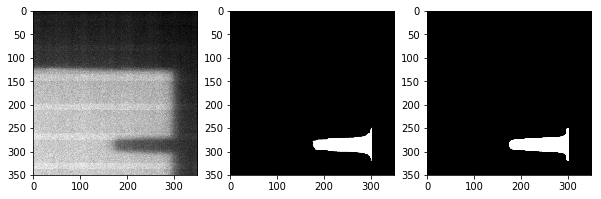

5: true_dist: [10], pred_dist: [10.023555]


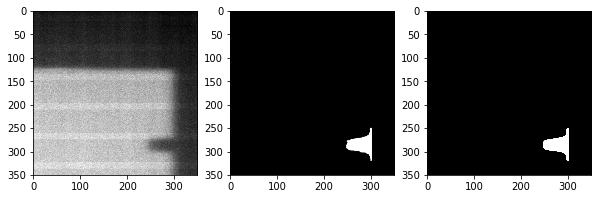

6: true_dist: [10], pred_dist: [9.985689]


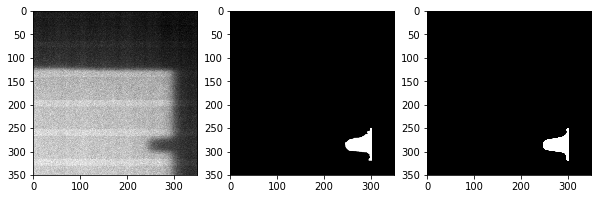

7: true_dist: [25], pred_dist: [24.851362]


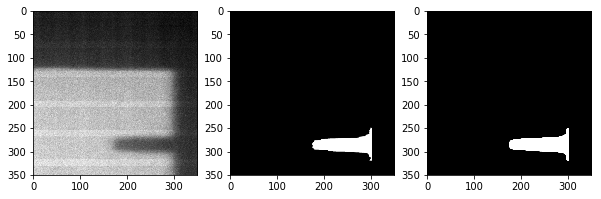

8: true_dist: [10], pred_dist: [9.913836]


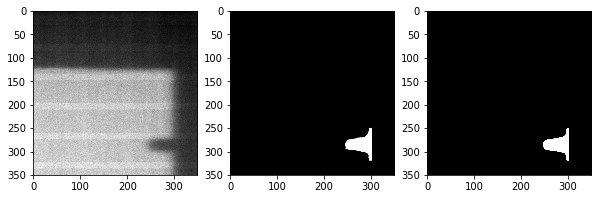

9: true_dist: [2], pred_dist: [1.9056449]


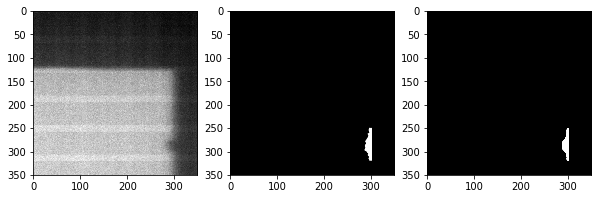

10: true_dist: [4], pred_dist: [3.9904845]


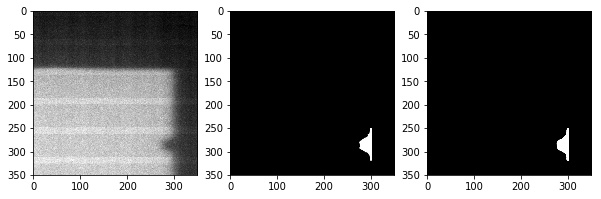

11: true_dist: [4], pred_dist: [3.8937416]


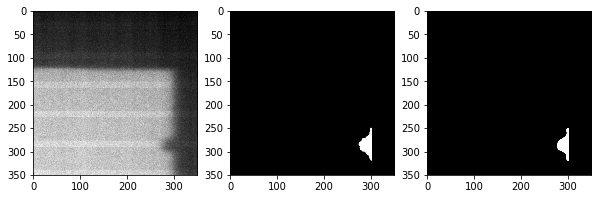

12: true_dist: [10], pred_dist: [9.959717]


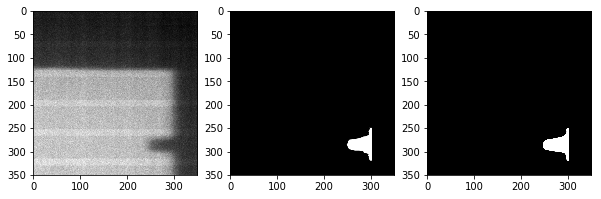

13: true_dist: [2], pred_dist: [2.0285203]


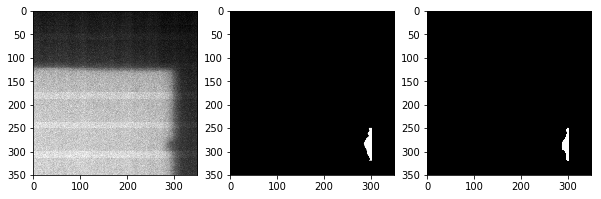

14: true_dist: [25], pred_dist: [24.934626]


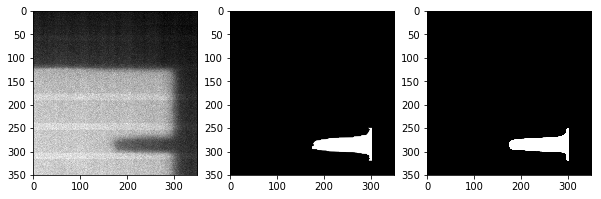

15: true_dist: [4], pred_dist: [3.9599311]


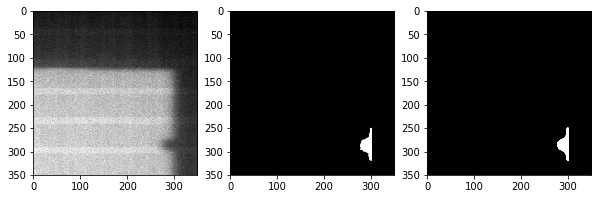

16: true_dist: [2], pred_dist: [1.9157636]


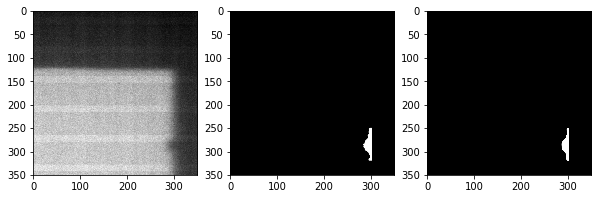

17: true_dist: [4], pred_dist: [3.8846097]


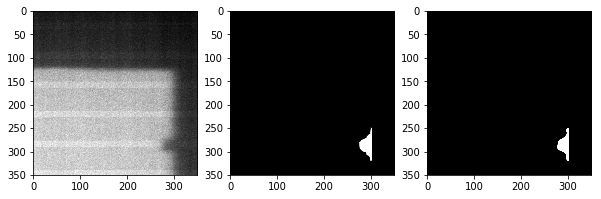

18: true_dist: [10], pred_dist: [9.887243]


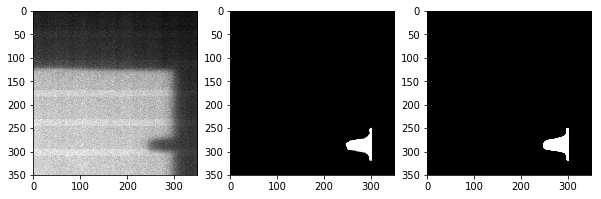

19: true_dist: [25], pred_dist: [24.983866]


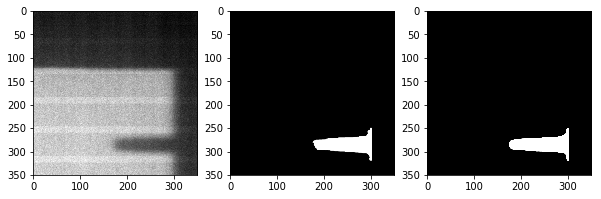

20: true_dist: [10], pred_dist: [9.771694]


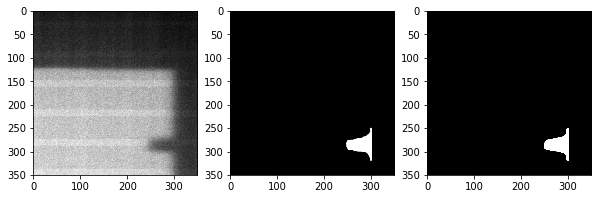

21: true_dist: [10], pred_dist: [9.992233]


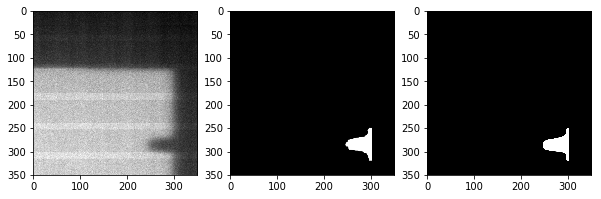

22: true_dist: [25], pred_dist: [24.750002]


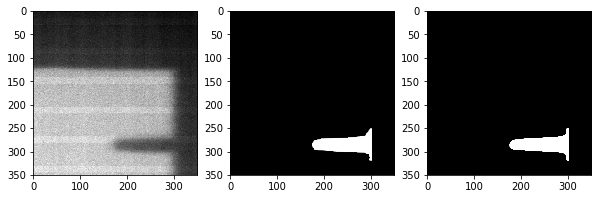

23: true_dist: [4], pred_dist: [3.9297953]


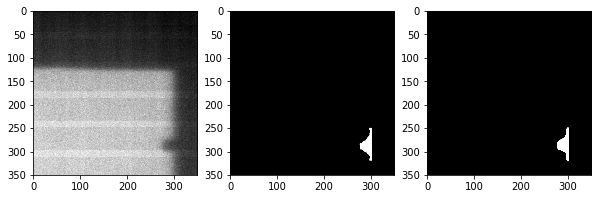

24: true_dist: [10], pred_dist: [10.131635]


In [ ]:

for i, batch in enumerate(test_data_loader):

    true_images, true_masks, true_dists = batch['image'], batch['mask'], batch['dist']
    pred_masks, pred_dists = model_inference(true_images.float().to(device))
    print("batch {}".format(i+1))
    for j, (img, tr_msk, tr_dist, pr_msk, pr_dist) in enumerate(zip(true_images,
                                                 true_masks, 
                                                 true_dists.cpu().detach().numpy(),
                                                 pred_masks.cpu().detach().numpy(), 
                                                 pred_dists.cpu().detach().numpy())):
    
        true_dist = tr_dist
        pred_dist = pr_dist
        print("{}: true_dist: {}, pred_dist: {}".format(j+1, true_dist, pred_dist))
        
        f = plt.figure(figsize=(10,5))
        f.add_subplot(1,3, 1)
        plt.imshow(img[0,...], cmap='gray')
        f.add_subplot(1,3, 2)
        plt.imshow(tr_msk[0,...], cmap='gray')
        f.add_subplot(1,3, 3)
        plt.imshow(pr_msk[0,...], cmap='gray')
        plt.show(block=True)
        
    if i==1:
        break